## Numpy

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [10]:
import random
import numpy as np
from timeit import timeit

In [18]:
%%timeit
arr1 = np.random.rand(10_000)
arr1 = arr1 + 1

96.2 μs ± 2.38 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [19]:
%%timeit
arr2 = list([random.random() for _ in range(10_000)])
arr2 = [i + 1 for i in arr2]

2.09 ms ± 118 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [22]:
from math import sin, cos

In [23]:
%%timeit
arr1 = np.random.rand(10_000)
arr1 = np.sin(arr1) + np.cos(arr1)

267 μs ± 25.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [25]:
%%timeit
arr2 = [random.random() for _ in range(10_000)]
arr2 = [sin(x) + cos(x) for x in arr2]

3.88 ms ± 532 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [26]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [27]:
def cube_sum2(x):
    return np.sum(np.array(x) ** 3)

In [28]:
def almost_variance2(x):
    x = np.array(x)
    m = np.mean(x)
    return 1/x.size * np.sum((x - m)**4)

In [29]:
x = np.arange(1000)

In [30]:
%%timeit
cube_sum(x)

269 μs ± 36.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
%%timeit
cube_sum2(x)

10.7 μs ± 1.47 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [32]:
%%timeit
almost_variance(x)

531 μs ± 28.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
%%timeit
almost_variance2(x)

46.2 μs ± 3.92 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [34]:
A = (np.arange(10).reshape(10,1) + 1) * (np.arange(10).reshape(1,10) + 1)
print(A)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [35]:
np.random.seed(1)
A = np.random.randint(-100, 100, (10,5))
print(np.sum((A[:, np.newaxis, :] - A[np.newaxis, :, :]) ** 2, axis= 2))

[[    0 13560 48583 19419  8594 45867 44411 32915 24313 55414]
 [13560     0 44851 13267 25270 51175 45951 12479  7585 50718]
 [48583 44851     0 34074 21585 21480 19254 23400 34950 10117]
 [19419 13267 34074     0 22899 49770 55114 14802 16166 55507]
 [ 8594 25270 21585 22899     0 27165 23927 30277 27247 27722]
 [45867 51175 21480 49770 27165     0 10858 27888 46430 25915]
 [44411 45951 19254 55114 23927 10858     0 26466 31598  7149]
 [32915 12479 23400 14802 30277 27888 26466     0  6830 29619]
 [24313  7585 34950 16166 27247 46430 31598  6830     0 32245]
 [55414 50718 10117 55507 27722 25915  7149 29619 32245     0]]


### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [36]:
def white2115(A):
    return np.array((A - np.mean(A, axis=0))/ np.std(A, axis=0), dtype=np.float64)

A = np.arange(10, dtype=np.float64).reshape(5,2)
print(white2115(A))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [37]:
def closest(x, A):
    return tuple(map(int, np.unravel_index(np.argmin(np.abs(A - x)), A.shape)))

A = np.array([[3,-4,3], [1,8,7]])
print(closest(1.5, A))

(1, 0)


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [38]:
def poly(x, a):
    return np.sum(np.array(a) * np.cumprod(np.insert(np.full((a.size -1), x), 0, 1)))

print(poly(2, np.array([1,2,3])))


17


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

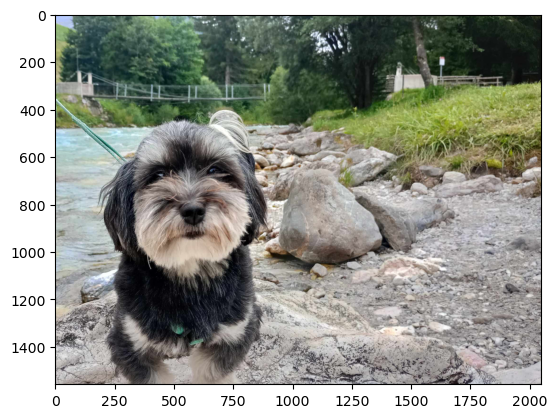

In [41]:
img = mpimg.imread('images/piesek.jpeg')
plt.imshow(img)

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

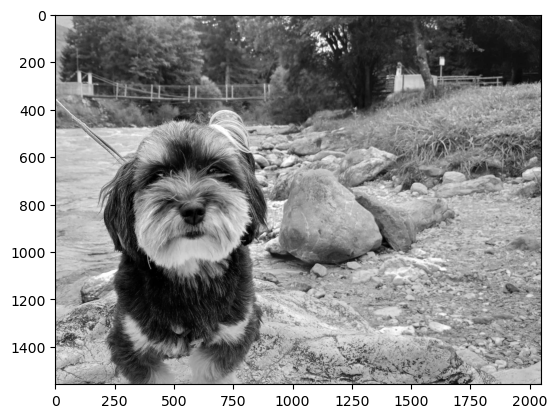

In [42]:
img = mpimg.imread('images/piesek.jpeg')
def przetworz(img):
    return np.dot(img[:, :, :3], np.array([0.2126, 0.7152, 0.0722]))

img = przetworz(img)
plt.imshow(img, cmap='gray')    


### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [43]:
def kombo(x1, x2):
    l1 = np.linspace(0.0, 1.0, 11) 
    l2 = np.ones(11) - l1
    print(l1)
    print(l2)
    return l1[:, np.newaxis] * x1 +  l2[:, np.newaxis] * x2
print(kombo(1,2))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]
[[2. ]
 [1.9]
 [1.8]
 [1.7]
 [1.6]
 [1.5]
 [1.4]
 [1.3]
 [1.2]
 [1.1]
 [1. ]]
